# 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

Import Library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Baca data

In [20]:
df = pd.read_csv("data/voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Pahami Informasi Data

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Encoding pada tabel

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

Korelasi

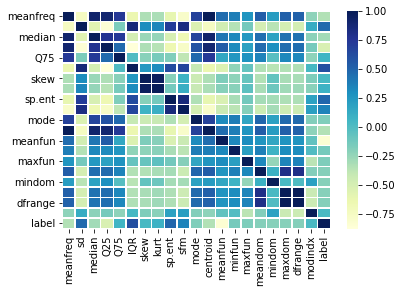

In [12]:
sns.heatmap(df.corr(), cmap="YlGnBu", linewidths=0.5)
plt.show()

Model SVM

In [13]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')

In [14]:
features = df.drop(['label'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(features)
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

Split Data

In [15]:
from sklearn.model_selection import train_test_split

y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

Evaluasi Model

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# memprediksi label pada data uji
y_pred = svm_classifier.predict(X_test)

# menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

# membuat classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy 0.9763406940063092
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
- Menggunakan data spam.csv
- Fitur CountVectorizer dengan mengaktifkan stop_words
- Evaluasi hasilnya

In [22]:
df = pd.read_csv('data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Hapus Kolom

In [23]:
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama Kolom

In [24]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

df = df.rename(columns=new_cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Encoding pada tabel

In [25]:
new_labels = {
    'spam': 1,
    'ham': 0
}

df['Labels'] = df['Labels'].map(new_labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Split Data

In [26]:
X = df['SMS'].values
y = df['Labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Transformasi Data dengan Countvectorizer
dapat mengubah teks menjadi vektor numerik yang digunakan oleh model pemodelan mesin

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# membuat CountVectorizer dengan mengaktifkan stop_words
count_vectorizer = CountVectorizer(stop_words='english')

# mengubah teks menjadi vektor fitur
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

Model Multinominal Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# membuat model Multinomial Naive Bayes
mnb = MultinomialNB()

# melatih model pada data latih
mnb.fit(X_train, y_train)

MultinomialNB()

Evaluasi Model

In [29]:
# memprediksi label pada data uji
y_pred = mnb.predict(X_test)

# menghitung akurasi
countvectorizer_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", countvectorizer_accuracy)

# membuat classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy 0.9829596412556054
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.94      0.93      0.93       145

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
- Menggunakan data spam.csv
- Fitur TF-IDF dengan mengaktifkan stop_words
- Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
- Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [30]:
df = pd.read_csv('data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Hapus kolom

In [31]:
# drop kolom yang tidak digunakan
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama Kolom

In [32]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

df = df.rename(columns=new_cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Encoding

In [33]:
new_labels = {
    'spam': 1,
    'ham': 0
}

df['Labels'] = df['Labels'].map(new_labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Split Data

In [43]:
X = df['SMS'].values
y = df['Labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Transformasi data dengan TF-IDF Vectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# membuat TfidfVectorizer dengan mengaktifkan stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# mengubah teks menjadi vektor fitur
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

Model Multinomial Naive Bayes

In [45]:
# membuat model Multinomial Naive Bayes
mnb = MultinomialNB()

# melatih model pada data latih
mnb.fit(X_train, y_train)

MultinomialNB()

Evaluasi Model

In [46]:
# memprediksi label pada data uji
y_pred = mnb.predict(X_test)

# menghitung akurasi
tf_idf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", tf_idf_accuracy)

# membuat classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy 0.9739910313901345
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       970
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Hasil penggunaan CountVectorizer dan TF-IDF Vectorizer

- CountVectorizer --> 0.9829596412556054
- TF-IDF Vectorizer --> 0.9739910313901345

Dalam konteks ini saya menghasilkan CountVectorizer lebih tinggi nilainya dari pada TF-IDF Vectorizer maka saya dapat menyimpulkan bahwa CountVectorizer lebih cepat dalam menghasilkan representasi teks